<h2 style="text-align: center; text-decoration: underline">Students Performance Analysis</h2>

In [4]:
#Requirements for the file
#Run the cell once
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



<h3 style="font-weight: bold">1. Basic Exploratory Analysis</h3>
<ul>
    <li>What's the overall distribution of math, reading, and writing scores?</li>
    <li>How many students are in each gender, race/ethnicity, and parental education group?</li>
    <li>What percentage of students received free/reduced lunch?</li>
</ul>

In [5]:
#Load the data into a dataframe
df=pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


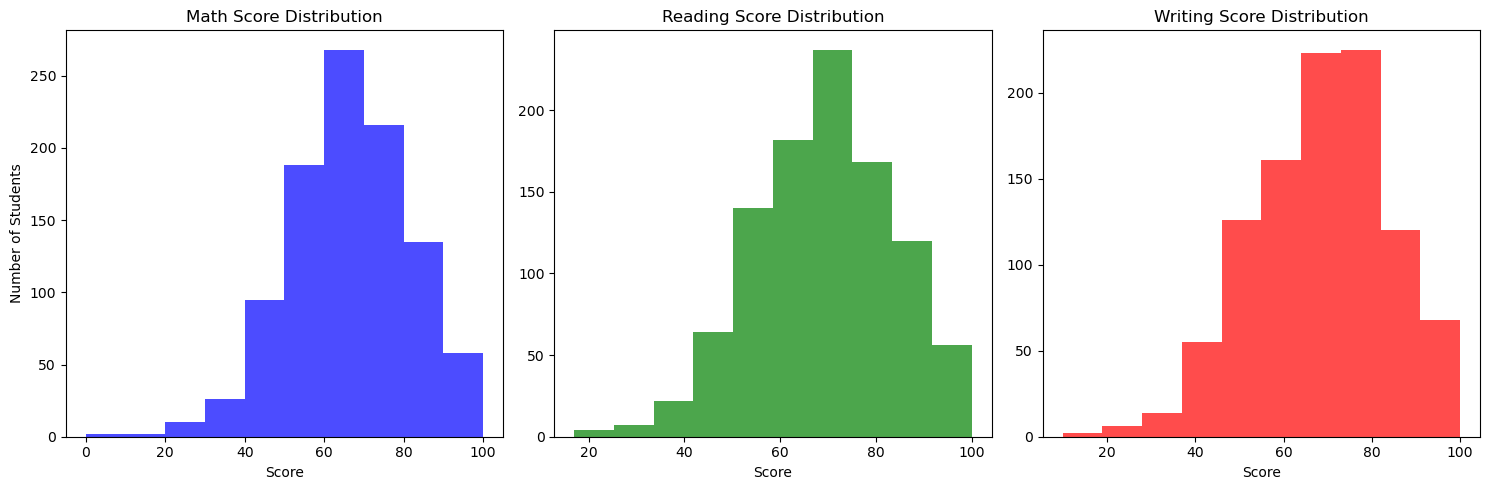

In [6]:
#Overall distribution of math, reading, and writing score
# Visualize the distribution of scores
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df["math score"], bins=10, color='blue', alpha=0.7)
plt.title('Math Score Distribution')
plt.xlabel('Score')
plt.ylabel('Number of Students')

plt.subplot(1, 3, 2)
plt.hist(df["reading score"], bins=10, color='green', alpha=0.7)
plt.title('Reading Score Distribution')
plt.xlabel('Score')

plt.subplot(1, 3, 3)
plt.hist(df["writing score"], bins=10, color='red', alpha=0.7)
plt.title('Writing Score Distribution')
plt.xlabel('Score')

plt.tight_layout()
plt.show()



In [7]:
#Total number of students in each gender
genders = df["gender"].unique()
print(f"{genders}\n")

females = (df["gender"] == "female").sum()
males = (df["gender"] == "male").sum()
print("Gender distribution: ")
print(f"females = {females}")
print(f"males = {males}")

#Total number of students in each ethnicity
ethnicity = df["race/ethnicity"].unique()
print("\nEthnicity distribution: ")
for group in ethnicity:
    total_number = (df["race/ethnicity"] == group).sum()
    print(f"{group} = {total_number}")

#Total number of students in each parental education group
parental_education = df["parental level of education"].unique()
print(f"\nParental level of education distribution: ")
for level in parental_education:
    total_number = (df["parental level of education"] == level).sum()
    print(f"{level} = {total_number}")
    
#Percentage of students receiving free/reduced lunch
free_reduced = (df["lunch"] == "free/reduced").sum()
percentage = (free_reduced / len(df["lunch"])) * 100
print(f"\nPercentage of students receiving free/reduced lunch = {percentage}")

['female' 'male']

Gender distribution: 
females = 518
males = 482

Ethnicity distribution: 
group B = 190
group C = 319
group A = 89
group D = 262
group E = 140

Parental level of education distribution: 
bachelor's degree = 118
some college = 226
master's degree = 59
associate's degree = 222
high school = 196
some high school = 179

Percentage of students receiving free/reduced lunch = 35.5


<h3 style="font-weight: bold">2. Performance Analysis</h3>
<ul>
    <li>What is the average performance across the three subjects?</li>
    <li>Which subject has the highest average score? Which has the lowest?</li>
    <li>Are there significant performance gaps between different demographic groups?</li>
</ul>

The averages of math, reading and writing subjects are 66.089, 69.169 and 68.054 respectively
The highest subject is ['Reading'] with 69.169
The lowest subject is ['Math'] with 66.089
=== Performance by Gender ===
        math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


<Figure size 1000x600 with 0 Axes>

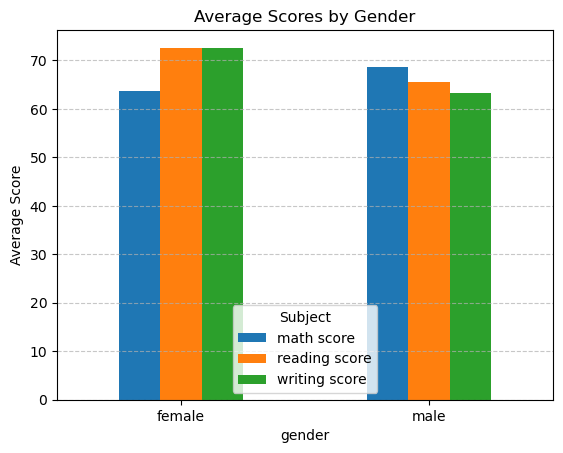


=== Performance by Race/Ethnicity ===
                math score  reading score  writing score
race/ethnicity                                          
group A          61.629213      64.674157      62.674157
group B          63.452632      67.352632      65.600000
group C          64.463950      69.103448      67.827586
group D          67.362595      70.030534      70.145038
group E          73.821429      73.028571      71.407143


<Figure size 1200x600 with 0 Axes>

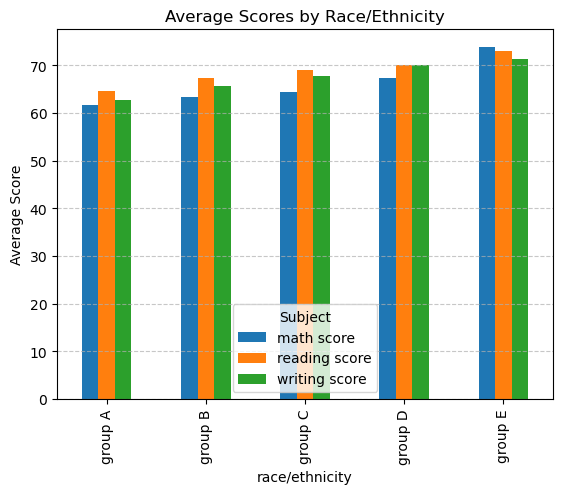


=== Performance by Parental Education ===
                             math score  reading score  writing score
parental level of education                                          
associate's degree            67.882883      70.927928      69.896396
bachelor's degree             69.389831      73.000000      73.381356
high school                   62.137755      64.704082      62.448980
master's degree               69.745763      75.372881      75.677966
some college                  67.128319      69.460177      68.840708
some high school              63.497207      66.938547      64.888268


<Figure size 1500x600 with 0 Axes>

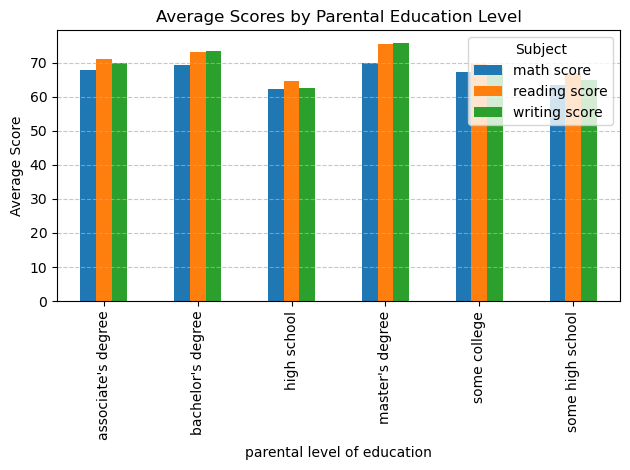


=== Performance by Lunch Type ===
              math score  reading score  writing score
lunch                                                 
free/reduced   58.921127      64.653521      63.022535
standard       70.034109      71.654264      70.823256


<Figure size 1000x600 with 0 Axes>

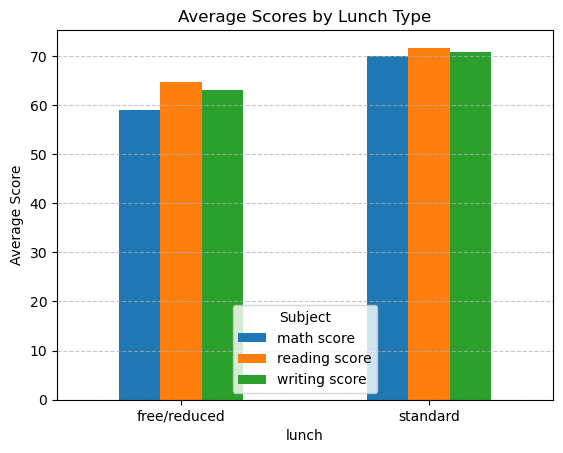


=== Performance by Test Preparation ===
                         math score  reading score  writing score
test preparation course                                          
completed                 69.695531      73.893855      74.418994
none                      64.077882      66.534268      64.504673


<Figure size 1000x600 with 0 Axes>

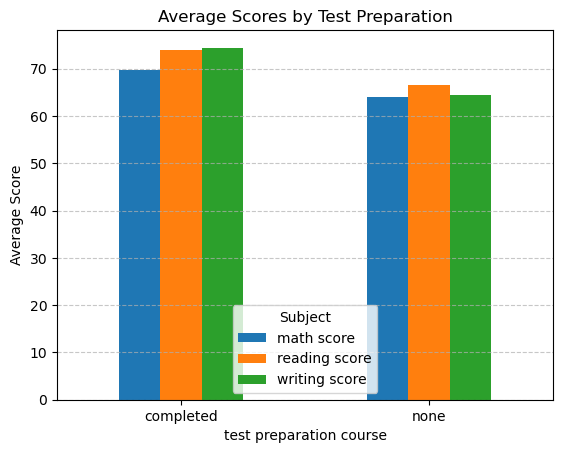

In [8]:
#Average performance across the three subjects
math_avg = df["math score"].agg('mean') #Math
reading_avg = df["reading score"].agg('mean') #Reading
writing_avg = df["writing score"].agg('mean') #Writing

print(f'The averages of math, reading and writing subjects are {math_avg}, {reading_avg} and {writing_avg} respectively')

#Highest and Lowest subject
averages = {
        'Math': math_avg,
        'Reading': reading_avg,
        'Writing': writing_avg
    }

highest_score = max(averages.values())
highest_subject = [subject for subject in averages if averages[subject] == highest_score] #List comprehension
print(f'The highest subject is {highest_subject} with {highest_score}')

lowest_score = min(averages.values())
lowest_subject = [subject for subject in averages if averages[subject] == lowest_score]
print(f'The lowest subject is {lowest_subject} with {lowest_score}')

# Performance gaps across demographic groups

# 1. Gender performance gaps
print("=== Performance by Gender ===")
gender_performance = df.groupby("gender")[["math score", "reading score", "writing score"]].mean()
print(gender_performance)

# Visualize gender performance
plt.figure(figsize=(10, 6))
gender_performance.plot(kind="bar")
plt.title("Average Scores by Gender")
plt.ylabel("Average Score")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=0)
plt.legend(title="Subject")
plt.show()

# 2. Race/Ethnicity performance gaps
print("\n=== Performance by Race/Ethnicity ===")
race_performance = df.groupby("race/ethnicity")[["math score", "reading score", "writing score"]].mean()
print(race_performance)

# Visualize race/ethnicity performance
plt.figure(figsize=(12, 6))
race_performance.plot(kind="bar")
plt.title("Average Scores by Race/Ethnicity")
plt.ylabel("Average Score")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Subject")
plt.show()

# 3. Parental Education performance gaps
print("\n=== Performance by Parental Education ===")
parent_edu_performance = df.groupby("parental level of education")[["math score", "reading score", "writing score"]].mean()
print(parent_edu_performance)

# Visualize parental education performance
plt.figure(figsize=(15, 6))
parent_edu_performance.plot(kind="bar")
plt.title("Average Scores by Parental Education Level")
plt.ylabel("Average Score")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Subject")
plt.tight_layout()
plt.show()

# 4. Lunch Type performance gaps (socioeconomic indicator)
print("\n=== Performance by Lunch Type ===")
lunch_performance = df.groupby("lunch")[["math score", "reading score", "writing score"]].mean()
print(lunch_performance)

# Visualize lunch type performance
plt.figure(figsize=(10, 6))
lunch_performance.plot(kind="bar")
plt.title("Average Scores by Lunch Type")
plt.ylabel("Average Score")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=0)
plt.legend(title="Subject")
plt.show()

# 5. Test Preparation Course performance gaps
print("\n=== Performance by Test Preparation ===")
test_prep_performance = df.groupby("test preparation course")[["math score", "reading score", "writing score"]].mean()
print(test_prep_performance)

# Visualize test preparation performance
plt.figure(figsize=(10, 6))
test_prep_performance.plot(kind="bar")
plt.title("Average Scores by Test Preparation")
plt.ylabel("Average Score")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=0)
plt.legend(title="Subject")
plt.show()



<h3 style="font-weight: bold">3. Correlation Analysis</h3>
<ul>
    <li>Correlation between math, reading, and writing scores</li>
    <li>Performance prediction</li>
</ul>

In [9]:
math_reading = df["math score"].corr(df["reading score"])
reading_writing = df["reading score"].corr(df["writing score"])
math_writing = df["math score"].corr(df["writing score"])



Correlation Matrix:
               math score  reading score  writing score
math score           1.00           0.82           0.80
reading score        0.82           1.00           0.95
writing score        0.80           0.95           1.00


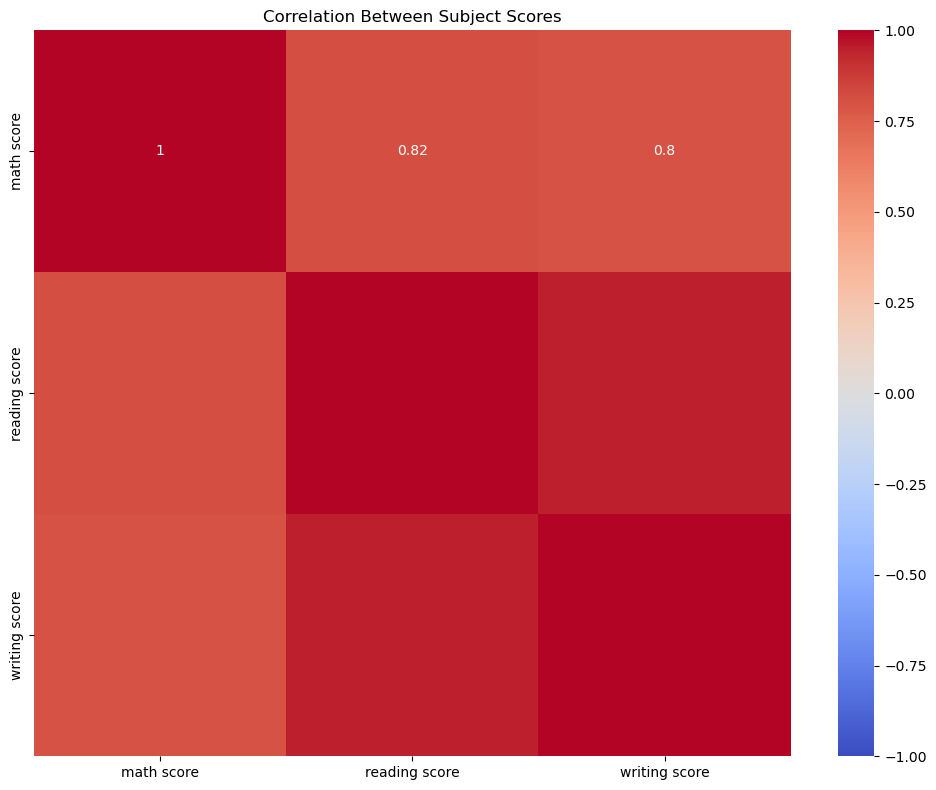

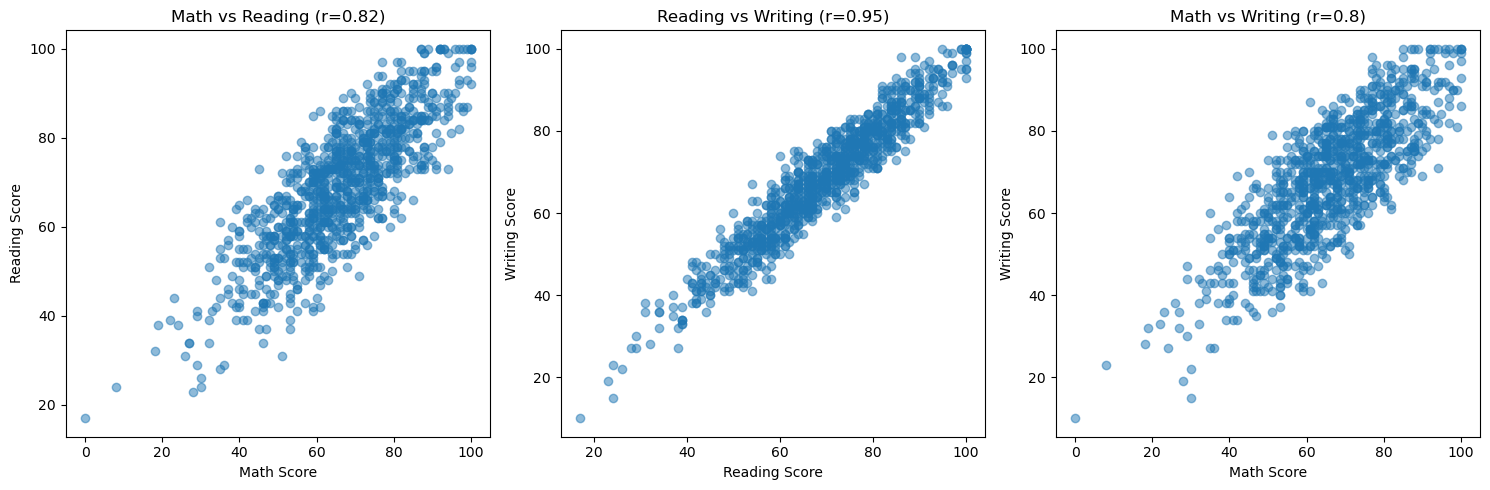

In [10]:

# Create a correlation matrix for all three subjects
score_cols = ["math score", "reading score", "writing score"]
corr_matrix = df[score_cols].corr().round(2)
print("\nCorrelation Matrix:")
print(corr_matrix)

# Visualize the correlations with a heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Between Subject Scores")
plt.tight_layout()
plt.show()

# Visualize relationships with scatter plots
plt.figure(figsize=(15, 5))

# Math vs Reading
plt.subplot(1, 3, 1)
plt.scatter(df["math score"], df["reading score"], alpha=0.5)
plt.title(f"Math vs Reading (r={math_reading.round(2)})")
plt.xlabel("Math Score")
plt.ylabel("Reading Score")

# Reading vs Writing
plt.subplot(1, 3, 2)
plt.scatter(df["reading score"], df["writing score"], alpha=0.5)
plt.title(f"Reading vs Writing (r={reading_writing.round(2)})")
plt.xlabel("Reading Score")
plt.ylabel("Writing Score")

# Math vs Writing
plt.subplot(1, 3, 3)
plt.scatter(df["math score"], df["writing score"], alpha=0.5)
plt.title(f"Math vs Writing (r={math_writing.round(2)})")
plt.xlabel("Math Score")
plt.ylabel("Writing Score")

plt.tight_layout()
plt.show()

In [11]:
# Performance prediction using a simple linear regression model

# Predict writing scores from reading scores
X = df[["reading score"]].values
y = df["writing score"].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)  # Coefficient of determination
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # Root Mean Square Error

print(f"R² score: {r2.round(3)}")
print(f"RMSE: {rmse.round(2)}")
print(f"Coefficient: {model.coef_[0].round(3)}")
print(f"Intercept: {model.intercept_.round(2)}")

R² score: 0.915
RMSE: 4.68
Coefficient: 0.992
Intercept: -0.51


In [ ]:
# Sample using the above model
def predict_writing_score(reading_score):
    # Reshape input to match what the model expects (2D array)
    input_value = np.array([[reading_score]])

    predicted_writing_score = model.predict(input_value)[0]
    
    return round(predicted_writing_score)

reading_score = 75
predicted_writing = predict_writing_score(reading_score)
print(f"For a reading score of {reading_score}, the predicted writing score is {predicted_writing}")

For a reading score of 75, the predicted writing score is 74
